In [1]:
import pandas as pd
import numpy as np
import os
import random
#忽略警告错误的输出
import warnings
warnings.filterwarnings("ignore")
from scipy.spatial.distance import pdist #可计算多种距离
from sklearn.metrics import confusion_matrix

In [2]:
os.chdir('C://Users//dell/Desktop//')

In [3]:
iris = pd.read_csv('iris.csv').ix[:,1:6]

In [5]:
data = iris.ix[:,0:4]
l = data.shape[0]
c = data.shape[1]
data['classification'] = np.zeros(l) #初始化类别
#data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,classification
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
#定义划分类数
k =3

[random.randint(0,100) for _ in range(10)] #同时产生多个随机数，会重复
random.sample(range(0,150+1),3) #同时产生多个不重复的随机数

In [7]:
#选择初始随机点，返回点的行号
def initial_centers(l,k):
    c_index = random.sample(range(0,l+1),k)
    return c_index

In [8]:
#计算两点之间的距离，默认为euclidean
def compute_distence(vec1,vec2,type_of_distence = 'euclidean'):
    X=np.vstack([vec1,vec2])
    return pdist(X,type_of_distence)    

In [9]:
#重新计算类中心
def recompute_centers(data):
    l = data.shape[0]
    c = data.shape[1]
    cs = np.zeros([k,c-1])
    for i in range(k):
        class_i = data[data['classification']==str(i)].ix[:,0:-1] #第i类
        cs[i] = np.mean(class_i).tolist() #0:-1把最后一列类别去掉
    return cs

In [14]:
#初始化类中心，随机选取k个数作为类中心
c_index = initial_centers(l,k)
centers =data.iloc[c_index]
centers = centers.ix[:,0:-1]
centers

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
81,5.5,2.4,3.7,1.0
103,6.3,2.9,5.6,1.8
109,7.2,3.6,6.1,2.5


In [29]:
data['classification'] = np.zeros(l)

In [21]:
#划分类别
del data['classification']
instance_classify = []
for i in range(l):
    ds = []
    for j in range(k):
        dis = compute_distence(data.iloc[i],centers.iloc[j]) 
        ds.append(dis)
    cl = str((ds.index(min(ds))))
    instance_classify.append(cl) #ds.index(min(ds))获取最小距离的下标；str（）转化为字符串
data['classification'] = instance_classify

In [22]:
centers = recompute_centers(data)
#centers

array([[ 5.24756098,  3.11585366,  2.45731707,  0.63536585],
       [ 6.35740741,  2.94259259,  5.09444444,  1.80925926],
       [ 7.35      ,  3.15714286,  6.22142857,  2.15      ]])

In [34]:
for i in range(20):
    print(i)
    #将标签列删除
    del data['classification']
    instance_classify = []
    for i in range(l):
        ds = []
        for j in range(k):
            dis = compute_distence(data.iloc[i],centers[j]) 
            ds.append(dis)
        cl = str((ds.index(min(ds))))
        instance_classify.append(cl) #ds.index(min(ds))获取最小距离的下标；str（）转化为字符串
    data['classification'] = instance_classify
    #重新计算类中心
    centers = recompute_centers(data)    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [33]:
# show your cluster only available with 2-D data  
def showCluster(dataSet, k, centroids, clusterAssment):  
    numSamples, dim = dataSet.shape  
  
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):  
        print "Sorry! Your k is too large! please contact Zouxy"  
        return 1  
  
    # draw all samples  
    for i in xrange(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  
  
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    # draw the centroids  
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12)  
  
    plt.show()  

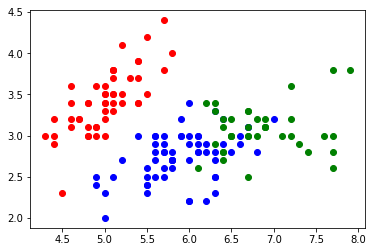

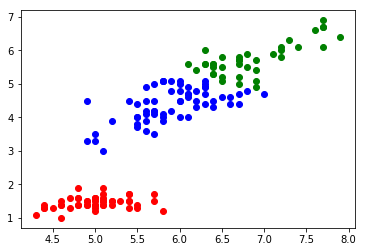

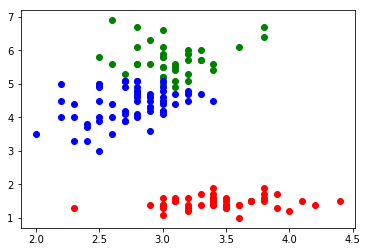

In [61]:
import matplotlib.pyplot as plt 
cll = data['classification']
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr'] 
for i in range(150):
    markIndex = int(cll[i])
    plt.plot(data.ix[i, 0], data.ix[i, 1],mark[markIndex])  
plt.show()  

for i in range(150):
    markIndex = int(cll[i])
    plt.plot(data.ix[i, 0], data.ix[i, 2],mark[markIndex])  
plt.show() 

for i in range(150):
    markIndex = int(cll[i])
    plt.plot(data.ix[i, 1], data.ix[i, 2],mark[markIndex])  
plt.show() 

In [55]:
data.ix[1,1]

3.0

In [52]:
confusion_matrix(np.array(iris['Species']),np.array(data['classification']))

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [50,  0,  0,  0,  0,  0],
       [ 0, 48,  2,  0,  0,  0],
       [ 0, 14, 36,  0,  0,  0]], dtype=int64)

In [48]:
type(data['classification'])
np.array(data['classification'])

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '2',
       '2', '2', '1', '2', '2', '2', '2', '2', '2', '1', '1', '2', '2',
       '2', '2', '1', '2', '1', '2', '1', '2', '2', '1', '1', '2', '2',
       '2', '2', '2', '1', '2', '2', '2', '2', '1', '2', '2', '2', '1',
       '2', '2', '2', '1', '2', '2', '1'], dtype=object)

In [50]:
type(iris['Species'])

pandas.core.series.Series

In [42]:
set(iris['Species'])

{'setosa', 'versicolor', 'virginica'}

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [2, 1, 0, 0, 0, 0]], dtype=int64)

In [127]:
del data['classification']
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
np.mean(data[data['classification']==0])

In [17]:
import numpy as np
x=np.random.random(10)
y=np.random.random(10)

#方法一：根据公式求解
d1=np.sqrt(np.sum(np.square(x-y)))

#方法二：根据scipy库求解
from scipy.spatial.distance import pdist
X=np.vstack([x,y])
d2=pdist(X)

In [60]:
np.arange(l)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [44]:
?pdist(X)